In [4]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

In [5]:
s = corpus.parse('bach/bwv65.2.xml')

s.analyze('key')
s.show('midi')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [6]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

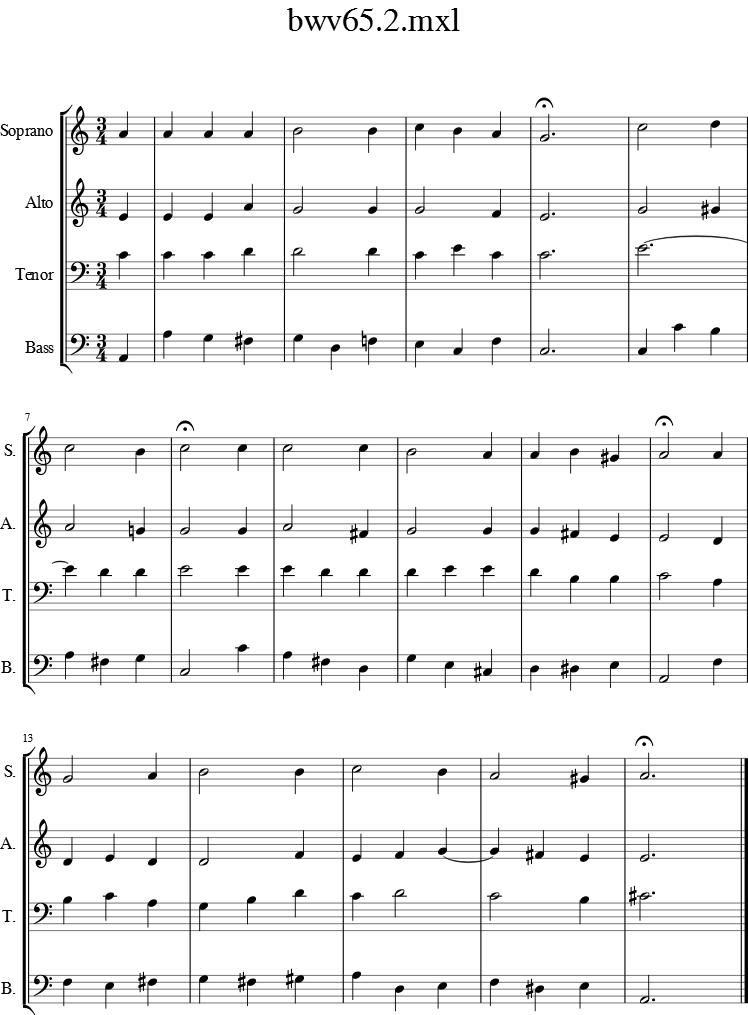

In [7]:
s.show()

score sは４つのPartから構成される（上記の例だと楽器ごとにひとつずつPartがある）

In [ ]:
[type(x) for x in s.getElementsByClass(stream.Stream)] #a lot of "Part"s

Partはmeasure(小節)から成る
unlike the deepjazz example, each Parts consists of "Measure"s

In [ ]:
[[type(y) for y in x.getElementsByClass(stream.Stream)] for x in s.getElementsByClass(stream.Stream)]

In [ ]:
s2 = [(x) for x  in s.flat.getElementsByClass(note.Note)]#example of how to flatten the scoreb

In [ ]:
print(type(s2))#score

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ

In [11]:
s_parts = [x for x in s.parts]
measures = [x for x in s_parts[0].getElementsByClass(stream.Measure)]
type(measures[0])

music21.stream.Measure

0